Task 1: import libraries

In [44]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
if not os.path.isdir('models'):
    os.mkdir('models')
print('TensorFlow version',tf. __version__)
print('is using GPU?',tf.test.is_gpu_available())

TensorFlow version 2.17.0
is using GPU? False


task 2:preprocess data

In [47]:
def get_three_classes(x,y):
    indices_0, _ = np.where(y==0.)
    indices_1, _ = np.where(y==1.)
    indices_2, _ = np.where(y==2.)
    indices=np.concatenate([indices_0, indices_1,indices_2],axis=0)
    x= x[indices]
    y= y[indices]
    count= x.shape[0]
    indices = np.random.choice(range(count),count,replace=False)
    x= x[indices]
    y= y[indices]
    y= tf.keras.utils.to_categorical(y)
    return x,y

In [49]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)  
x_test,y_test=get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


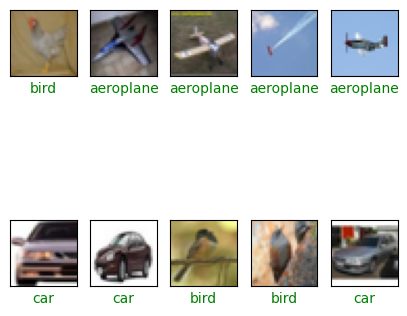

In [52]:
class_names=['aeroplane','car','bird']
def show_random_examples(x,y,p):
    indices=np.random.choice(range( x.shape[0]),10,replace=False)
    x= x[indices]
    y= y[indices]
    p= p[indices]
    plt.figure(figsize=(5,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col= 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()
show_random_examples(x_train,y_train,y_train)

In [ ]:
show_random_examples(x_test,y_test,y_test)

task 4:create model

In [40]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense
def create_model():
    def add_conv_block(model,num_filters):
        model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0,5))
        return model
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    model=add_conv_block(model,32)
    model=add_conv_block(model,64)
    model=add_conv_block(model,128)
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',metrics=['accuracy']
    )
    return model
model = create_model()
model.summary()
        

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,443 (1.10 MB)

 Trainable params: 288,995 (1.10 MB)

 Non-trainable params: 448 (1.75 KB)